In [ ]:
# Exploring 13,000 employees that we've transmitted from Aloha

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
emp = pd.read_csv('../data/aloha_employees.csv');

In [3]:
emp.describe()

,Zip,JobCode1,JobCode2,JobCode3,JobCode4,PayRate1,PayRate2,PayRate3,Terminated,ZapID,ReHire,Married,NumDependants
count,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000,13790.000000
mean,69844.309355,93.363452,102.623060,66.583466,42.800000,6.502302,3.587255,1.690547,0.665845,1.613053,0.089558,0.219434,0.180276
std,26978.232926,665.952638,1059.495467,800.822690,876.165766,3.611012,3.865995,3.266108,0.471711,3.192102,0.285557,0.478108,0.759203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70501.000000,6.000000,0.000000,0.000000,0.000000,2.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77055.000000,18.000000,4.000000,0.000000,0.000000,7.250000,2.130000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,77567.500000,50.000000,40.000000,1.000000,0.000000,9.000000,7.250000,2.130000,1.000000,1.000000,0.000000,0.000000,0.000000
max,809069.000000,9998.000000,64555.000000,64555.000000,64555.000000,24.000000,24.000000,24.000000,1.000000,31.000000,1.000000,3.000000,12.000000


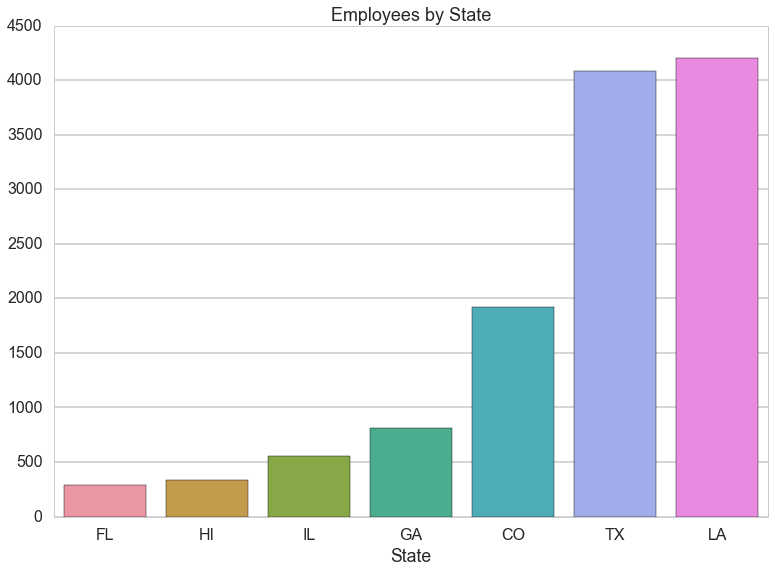

In [76]:
# Cleaning State data
df = emp.replace(['LOUISIANA', 'LA.', 'TEXAS', 'Texas', 'HAWAII', 'COLORADO', 'ILLINOIS', 'GEORGIA', 'CO.', 'GEORIA', 
                  'CALIFORNIA', 'TX.', 'WASHINGTON', 'DENVER', 'GA.', 'GJ', 'MISSOURI', 'TXQ', 'NEW YORK', '7X', ' TX'], 
                 ['LA', 'LA', 'TX', 'TX', 'HI', 'CO', 'IL', 'GA', 'CO', 'GA', 'CA', 'TX', 'WA', 'CO', 'GA', 'GA', 'MO', 'TX', 
                  'NY', 'TX', 'TX']) 
emp_by_state = df.groupby("State").size()
emp_by_state = emp_by_state[emp_by_state >= 10]
emp_by_state.sort_values(inplace=True)
sns.set(style="whitegrid", color_codes=True)
sns.set_context("poster")
top_emp_by_state = sns.barplot(y=emp_by_state.values, x=emp_by_state.index)
top_emp_by_state.set_title("Employees by State", fontsize=18)